In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("customer_shopping_data.csv")

In [3]:
data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [4]:
data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


Checking for missing values : 

In [5]:
for column_title in data.columns:
    is_na = data[f"{column_title}"].isna().count() 
    print (f"{column_title} = {is_na}")
    
print("Number of empty Cellls:", data.isna().sum().sum())

invoice_no = 99457
customer_id = 99457
gender = 99457
age = 99457
category = 99457
quantity = 99457
price = 99457
payment_method = 99457
invoice_date = 99457
shopping_mall = 99457
Number of empty Cellls: 0


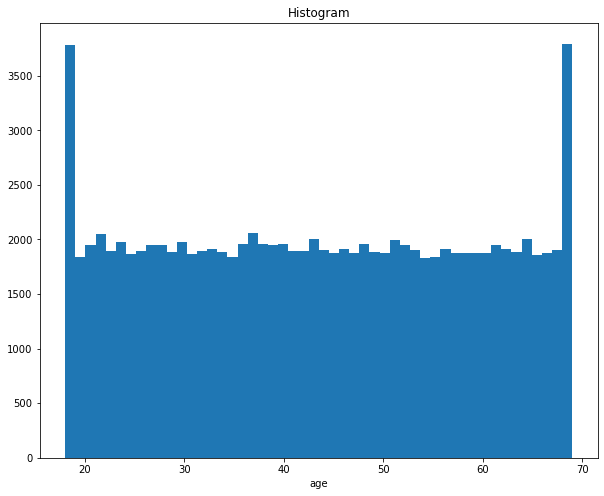

In [6]:
"""Visualizing Customers ages"""
plt.figure(figsize=(10, 8)) 
plt.hist(data.age,bins = 50)
plt.xlabel('age')

plt.title('Histogram')
plt.show()

Text(0.5, 1.0, 'Stem Graph')

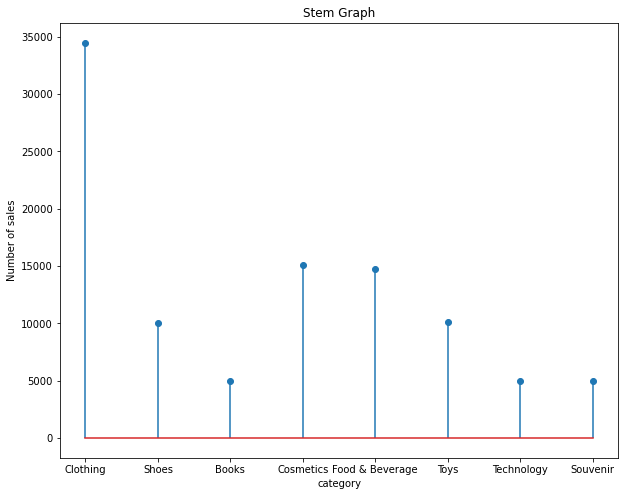

In [7]:
dic = {}
for cat in data.category.unique():
    num = len(data.category[data.category == f"{cat}"])
    dic[cat] = num


plt.figure(figsize=(10, 8))  
plt.stem(dic.keys(),dic.values())
plt.xlabel('category')
plt.ylabel('Number of sales')
plt.title('Stem Graph')

Text(0.5, 1.0, 'Stem Graph')

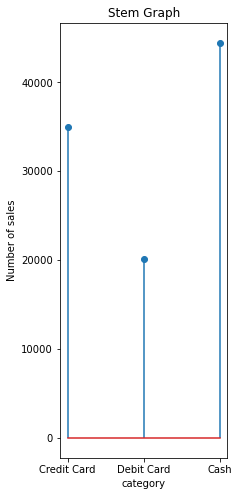

In [8]:
payment_method_dic = {}
for pay_method in data.payment_method.unique():
    num = len(data.payment_method[data.payment_method == f"{pay_method}"])
    payment_method_dic[pay_method] = num


plt.figure(figsize=(3, 8))  
plt.stem(payment_method_dic.keys(),payment_method_dic.values())
plt.xlabel('category')
plt.ylabel('Number of sales')
plt.title('Stem Graph')

In [9]:
len(data.shopping_mall.unique())

10

([<matplotlib.patches.Wedge at 0x1c91c2264c0>,
 [Text(-0.33356115677026393, 1.0482065420011857, 'female'),
  Text(0.33356125491044203, -1.0482065107709317, 'male')])

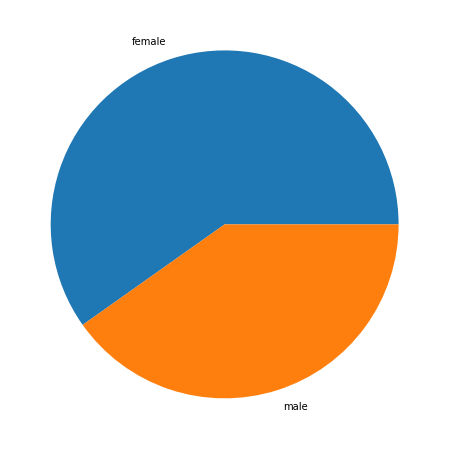

In [10]:
gender_dic = {}
gender_dic["female"] = len(data.gender[data.gender == "Female"])
gender_dic["male"] = len(data.gender[data.gender == "Male"])
plt.figure(figsize=(10, 8))
plt.pie(gender_dic.values(), labels=gender_dic.keys())

In [11]:
from sklearn.cluster import KMeans
WCSS = []
x = data.iloc[:, [5,6]].values

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit((np.array(data.price)).reshape(-1,1))
data.price = scaler.transform((np.array(data.price)).reshape(-1,1))

scaler.fit((np.array(data.age)).reshape(-1,1))
data.age = scaler.transform((np.array(data.age)).reshape(-1,1))

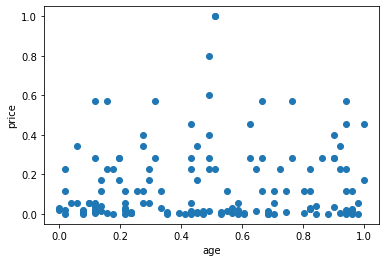

In [13]:
plt.xlabel("age")
plt.ylabel("price")
plt.scatter(data.age.head(150),data.price.head(150))

In [14]:
age_price = np.array(data[["age","price"]])

In [15]:
age_price

array([[0.19607843, 0.28507828],
       [0.05882353, 0.34229909],
       [0.03921569, 0.05621791],
       ...,
       [0.88235294, 0.00099718],
       [0.74509804, 0.79980056],
       [0.35294118, 0.00571236]])

In [23]:
data[["age","price"]]

,age,price
0,0.196078,0.285078
1,0.058824,0.342299
2,0.039216,0.056218
3,0.941176,0.571163
4,0.686275,0.010557
...,...,...
99452,0.529412,0.010185
99453,0.176471,0.000997
99454,0.882353,0.000997
99455,0.745098,0.799801


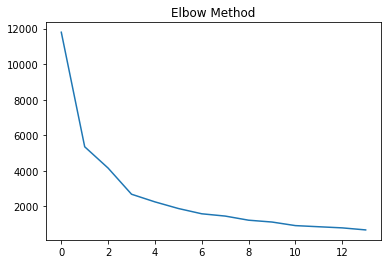

In [17]:
WCSS = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i,init = "k-means++",n_init="auto",random_state = 0)
    kmeans.fit(data[["age","price"]])
    WCSS.append(kmeans.inertia_)
plt.title("Elbow Method")
plt.plot(WCSS)

In [18]:
kmeans = KMeans(n_clusters = 6,init = "k-means++",n_init="auto",random_state = 0)
kmeans.fit(data[["age","price"]])
prediction = kmeans.predict(data[["age","price"]])
prediction

array([5, 5, 1, ..., 0, 3, 2])

In [28]:
data["Prediction"].unique()

array([5, 1, 4, 0, 2, 3])

In [19]:
data["Prediction"] = prediction

In [20]:
C1 = data[data.Prediction == 0]
C2 = data[data.Prediction == 1]
C3 = data[data.Prediction == 2]
C4 = data[data.Prediction == 3]
C5 = data[data.Prediction == 4]
C6 = data[data.Prediction == 5]
# C7 = data[data.Prediction == 6]
# C8 = data[data.Prediction == 7]
# C9 = data[data.Prediction == 8]
# C10 = data[data.Prediction == 9]
# C11 = data[data.Prediction == 10]
# C12 = data[data.Prediction == 11]
# C13 = data[data.Prediction == 12]

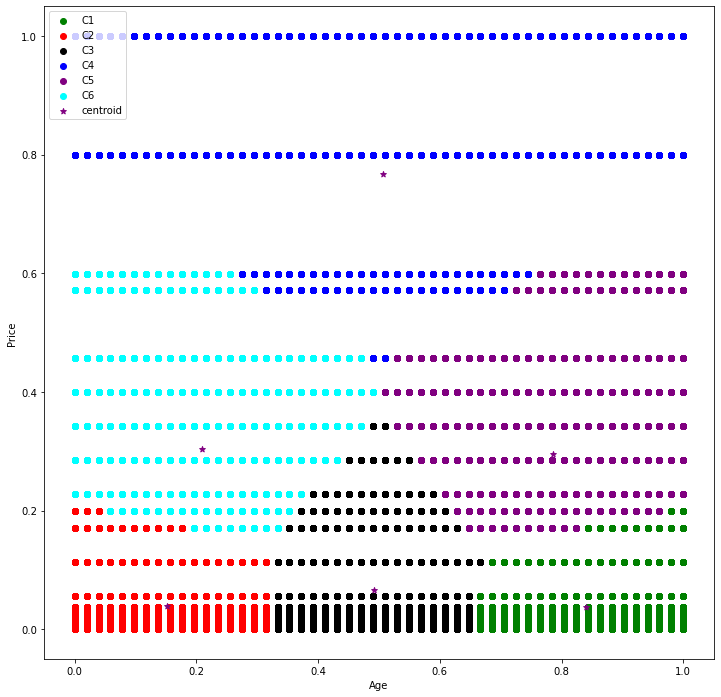

In [30]:
plt.figure(figsize=(12, 12))  
plt.scatter(C1["age"],C1["price"] , color ="green" ,label="C1")
plt.scatter(C2["age"],C2["price"] , color ="red" ,label="C2")
plt.scatter(C3["age"],C3["price"] , color ="black",label="C3" )
plt.scatter(C4["age"],C4["price"] , color ="blue" ,label="C4")
plt.scatter(C5["age"],C5["price"] , color ="purple" ,label="C5")
plt.scatter(C6["age"],C6["price"] , color ="cyan",label="C6" )
# plt.scatter(C7["age"],C7["price"] , color ="orange" ,label="C7")
# plt.scatter(C8["age"],C8["price"] , color ="pink" ,label="C8")
# plt.scatter(C9["age"],C9["price"] , color ="olive",label="C9" )
# plt.scatter(C10["age"],C10["price"] , color ="cyan" ,label="C10")
# plt.scatter(C11["age"],C11["price"] , color ="gray" ,label="C11")
# plt.scatter(C12["age"],C12["price"] , color ="black",label="C12" )
# plt.scatter(C13["age"],C13["price"] , color ="gray" ,label="C13")


plt.xlabel("Age")
plt.ylabel('Price')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
            color='purple',marker='*',label="centroid")

plt.legend()